In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [5]:
df = pd.DataFrame(digits.data)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
X = digits.data
y=digits.target

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=42)

In [15]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear',C=1.0)

In [21]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [22]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Test doğruluğu:", accuracy_score(y_test, y_pred))

Test doğruluğu: 0.9796296296296296


In [25]:
mask = (y==0) | (y==1)
X_two_classes = X[mask]     # X'ten sadece 0 ve 1 olan örnekler
y_two_classes = y[mask]     # y'den sadece 0 ve 1 olan etiketler
print(X_two_classes)
print(X_two_classes)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]
 ...
 [ 0.  0.  5. ...  8.  1.  0.]
 [ 0.  0.  6. ...  4.  0.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]
 ...
 [ 0.  0.  5. ...  8.  1.  0.]
 [ 0.  0.  6. ...  4.  0.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]]


In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components= 2)

In [31]:
X_pca=pca.fit_transform(X_two_classes)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_two_classes, test_size=0.3, random_state=42)


In [33]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

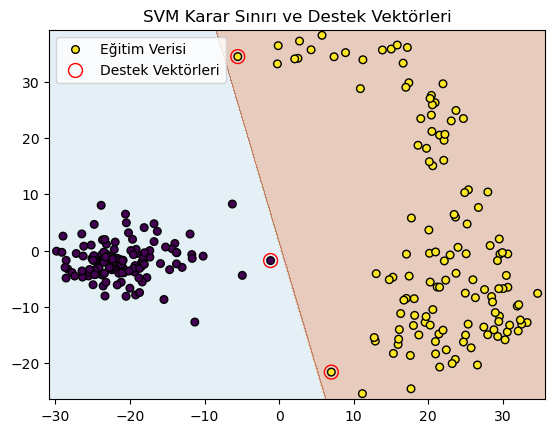

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#1.Grid oluşturmak için:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

#2.Her grid noktası için tahmin yapılır.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#3.Grafik çizimi yapılır.
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

#4.Eğitim verilerini çizilir.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, edgecolor='k', label='Eğitim Verisi')

#5.Destek vektörleri çizilir.
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            facecolors='none', edgecolors='r', s=100, label='Destek Vektörleri')

plt.legend()
plt.title('SVM Karar Sınırı ve Destek Vektörleri')
plt.show()
